<a href="https://colab.research.google.com/github/booorayan/fin_inclusion_pj/blob/master/Financial_Inclusion_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting If Individuals Are Likely To Have Or Use A Bank Account

## Importing Libraries to be Used

In [0]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

import pandas_profiling as pp

%matplotlib inline



## Loading the dataset

In [32]:
# loading the dataset and previewing the first 5 observations
url = 'http://bit.ly/FinancialDataset'

fin = pd.read_csv(url)
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [33]:
# checking the columns in the dataset

fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [34]:
# checking the size of dataframe
fin.shape

(23524, 13)

In [35]:
# checking the datatypes of the different columns

fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [36]:
fin['Has a Bank account'].value_counts()

No     20179
Yes     3309
Name: Has a Bank account, dtype: int64

## Tidying the Dataset/Data Cleaning

In [37]:
fin_copy = fin.copy()
fin_copy.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [38]:
# replacing spaces in column names with underscores and converting all column names to lowercase for uniformity
fin.columns = fin.columns.str.lower().str.replace(' ', '_')
fin.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
# renaming some column names 
fin.rename({'the_relathip_with_head': 'rltshp_with_head', 'type_of_job':'job_type', 'level_of_educuation': 'education_level', 'has_a_bank_account':'has_bank_account', 'type_of_location':'location', 'cell_phone_access': 'cellphone_access'}, axis=1, inplace=True)

In [40]:
fin.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'rltshp_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [41]:
# checking for missing values
fin.isnull().sum()


country                 14
year                     0
uniqueid                 0
has_bank_account        36
location                15
cellphone_access        11
household_size          28
respondent_age          34
gender_of_respondent    34
rltshp_with_head         4
marital_status          32
education_level         29
job_type                30
dtype: int64

In [42]:
# summary descriptive report of the dataset

pp.ProfileReport(fin)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
# pandas profiling report revealed anomalies in the year column(i.e. 2029, 2039 and 2056)
# removing the anomalies from the year column

ind = fin[(fin['year'] > 2018) | (fin['education_level'] == '6')].index
ind

fin.drop(ind, inplace=True)

In [44]:
# confirming if the the anomalies have been dropped

print(fin.year.unique())
print('\n')
print(fin.education_level.unique())

[2018 2016 2017]


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' nan]


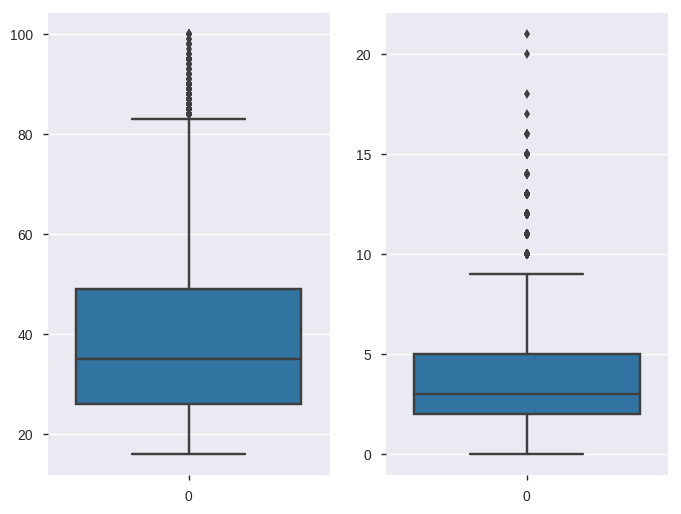

In [45]:
# checking for outliers in the numerical variables

finfig, axx = plt.subplots(1,2, figsize=(8,6))
sns.boxplot(data=fin['respondent_age'], ax=axx[0])
sns.boxplot(data=fin['household_size'], ax=axx[1])

# the outliers displayed a reasonable in reality and therefore no need to remove them


In [140]:
# checking for the sum of duplicate values

fin.duplicated().sum()

0

In [46]:
# checking for missing values 
fin.isnull().sum()

country                 14
year                     0
uniqueid                 0
has_bank_account        36
location                15
cellphone_access        11
household_size          28
respondent_age          34
gender_of_respondent    34
rltshp_with_head         4
marital_status          32
education_level         29
job_type                30
dtype: int64

In [47]:
# checking percent of missing values in dataset
pcnt_missing_values = (fin.isnull().sum().sum())/fin.shape[0]
pcnt_missing_values

0.011364603728611561

In [48]:
# Dropping missing values from dataframe (because % of missing values < 5%)

fin.dropna(inplace=True)
fin.isnull().sum()

country                 0
year                    0
uniqueid                0
has_bank_account        0
location                0
cellphone_access        0
household_size          0
respondent_age          0
gender_of_respondent    0
rltshp_with_head        0
marital_status          0
education_level         0
job_type                0
dtype: int64

In [49]:
# checking the number of observations in each column after dropping null values
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 13 columns):
country                 23313 non-null object
year                    23313 non-null int64
uniqueid                23313 non-null object
has_bank_account        23313 non-null object
location                23313 non-null object
cellphone_access        23313 non-null object
household_size          23313 non-null float64
respondent_age          23313 non-null float64
gender_of_respondent    23313 non-null object
rltshp_with_head        23313 non-null object
marital_status          23313 non-null object
education_level         23313 non-null object
job_type                23313 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


## Univariate and Bivariate Analysis

In [50]:
# frequency tables of columns

fin['has_bank_account'].value_counts()

No     20022
Yes     3291
Name: has_bank_account, dtype: int64

In [51]:
fin['country'].value_counts()

Rwanda      8665
Tanzania    6497
Kenya       6062
Uganda      2089
Name: country, dtype: int64

In [52]:
fin['uniqueid'].value_counts().sum()

23313

### Univariate Analysis

In [53]:
# measures of central tendency

# mean

mean_age = fin['respondent_age'].mean()
print('mean age: %.2f' % mean_age)

mean_hsehld_size = fin['household_size'].mean()
print('mean household size: %.2f' % mean_hsehld_size)

mode_year = fin['year'].mode()
print('mode year: %d' % mode_year)

mode_age = fin['respondent_age'].mode()
print('mode respondent age: %.0f' % mode_age)

mode_hshld_size = fin['household_size'].mode()
print('mode household size: %d' % mode_hshld_size)

median_age = fin['respondent_age'].median()
print('median age of respondents: %d' % median_age)

median_hs_size = fin['household_size'].median()
print('median household size: %d' %median_hs_size)


mean age: 38.79
mean household size: 3.69
mode year: 2016
mode respondent age: 30
mode household size: 2
median age of respondents: 35
median household size: 3


In [99]:
# measures of spread
# std
std_age = fin['respondent_age'].std()
print('Standard deviation in respondents\' age: {}' .format(std_age))

# variance
age_var = fin['respondent_age'].var()
print('Variance in respondents\' age: {}' .format(age_var))

# range of age

age_max = fin['respondent_age'].max()
age_min = fin['respondent_age'].min()

range_age = age_max - age_min
print('Range of respondents\' age: {}' .format(range_age))

# quartiles of age
quartiles = fin['respondent_age'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles))

# skewness
age_skew = fin['respondent_age'].skew()
print('Skewness in respondents\' age: {}' .format(age_skew))

# kurtosis
age_kurt = fin['respondent_age'].kurt()
print('Kurtosis in respondent age: {}'.format(age_kurt))

# normal distribution in respondent age

Standard deviation in respondents' age: 16.510610642873882
Variance in respondents' age: 272.6002638005803
Range of respondents' age: 84.0
first, second and third quartiles: 
0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
Skewness in respondents' age: 0.8412764239448531
Kurtosis in respondent age: 0.10122691422605756


In [119]:
# std
std_hs_size = fin['household_size'].std()
print('Standard deviation in household size: {}' .format(std_hs_size))

# variance in year
hs_size_var = fin['household_size'].var()
print('Variance in household size: {}' .format(hs_size_var))

# range of year

hs_size_max = fin['household_size'].max()
hs_size_min = fin['household_size'].min()

range_hs_size = hs_size_max - hs_size_min
print('Range of household size: {}' .format(range_hs_size))

# quartiles of age
quartiles_hs_size = fin['household_size'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles_hs_size))

# skewness
hs_size_skew = fin['household_size'].skew()
print('Skewness in household size: {}' .format(hs_size_skew))

# kurtosis
year_kurt = fin['household_size'].kurt()
print('Kurtosis in household size: {}'.format(year_kurt))


# distribution indicates presence of outliers

Standard deviation in household size: 2.2808421547364386
Variance in household size: 5.202240934822759
Range of household size: 21.0
first, second and third quartiles: 
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
Skewness in household size: 0.9737983207814955
Kurtosis in household size: 1.1530073057375057


21.0

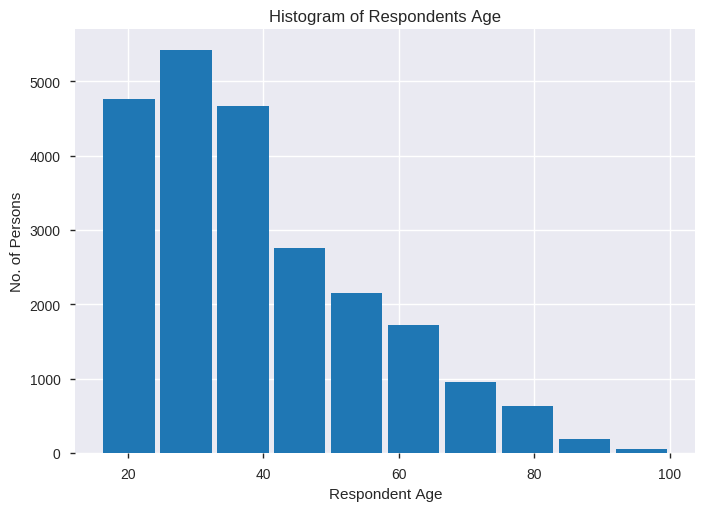

In [54]:
# histogram od the respondent age

plt.hist(fin['respondent_age'], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('No. of Persons')
plt.title('Histogram of Respondents Age')
plt.show()

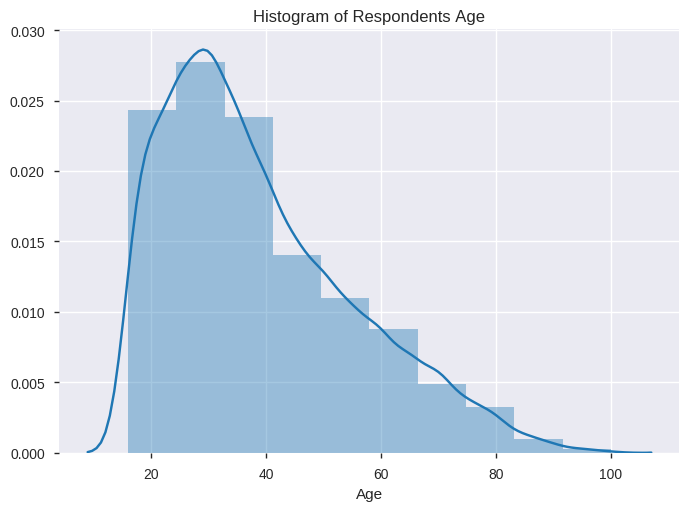

In [55]:
# histogram of respondent age 

sns.distplot(fin['respondent_age'], bins=10, axlabel='Age')
plt.title('Histogram of Respondents Age')
plt.show()

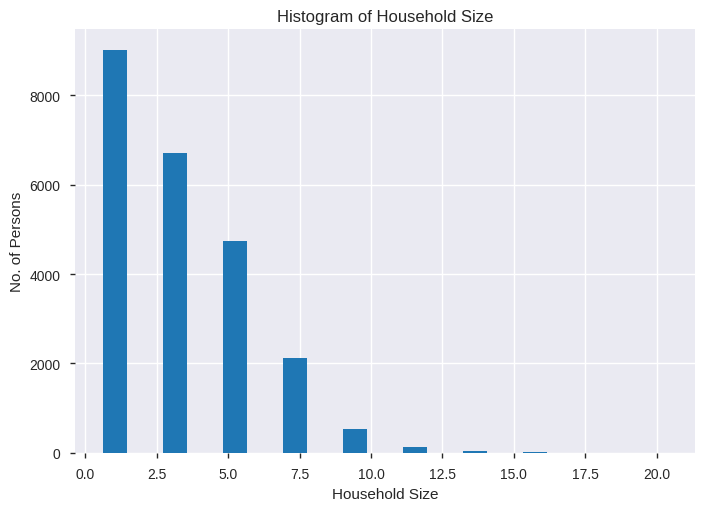

In [56]:

plt.hist(fin['household_size'], bins=10, histtype='bar', rwidth=0.4)
plt.xlabel('Household Size')
plt.ylabel('No. of Persons')
plt.title('Histogram of Household Size')
plt.show()

In [57]:
fin['household_size'].value_counts()

2.0     5065
1.0     3923
3.0     3510
4.0     3197
5.0     2714
6.0     2023
7.0     1377
8.0      739
9.0      354
10.0     191
11.0      66
12.0      65
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

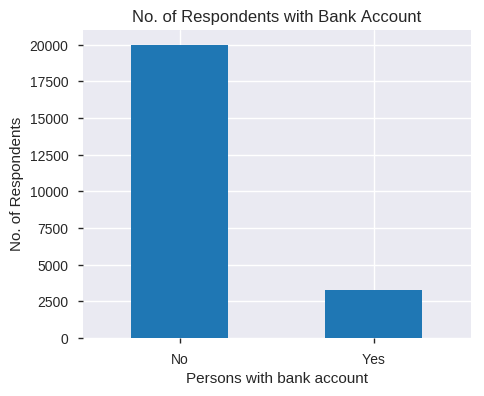

In [136]:
fin['has_bank_account'].value_counts().plot.bar(figsize=(5,4))
plt.xticks(rotation=360)
plt.xlabel('Persons with bank account')
plt.ylabel('No. of Respondents')
plt.title('No. of Respondents with Bank Account')
plt.show()

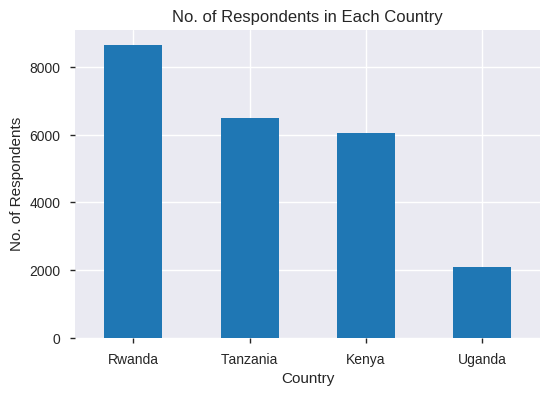

In [135]:
fin['country'].value_counts().plot.bar(figsize=(6,4))
plt.xticks(rotation=360)
plt.xlabel('Country')
plt.ylabel('No. of Respondents')
plt.title('No. of Respondents in Each Country')
plt.show()

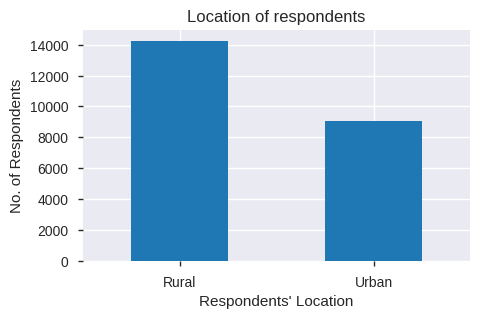

In [134]:
# location of respondents of dataset

fin['location'].value_counts().plot.bar(figsize=(5,3))
plt.xticks(rotation=360)
plt.xlabel('Respondents\' Location')
plt.ylabel('No. of Respondents')
plt.title('Location of respondents')
plt.show()

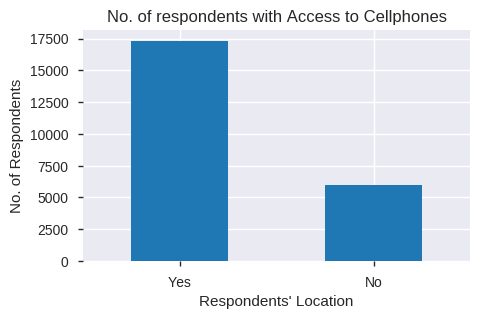

In [137]:
# no of respondents' with cell phone access

fin['cellphone_access'].value_counts().plot.bar(figsize=(5,3))
plt.xticks(rotation=360)
plt.xlabel('Respondents\' Location')
plt.ylabel('No. of Respondents')
plt.title('No. of respondents with Access to Cellphones')
plt.show()

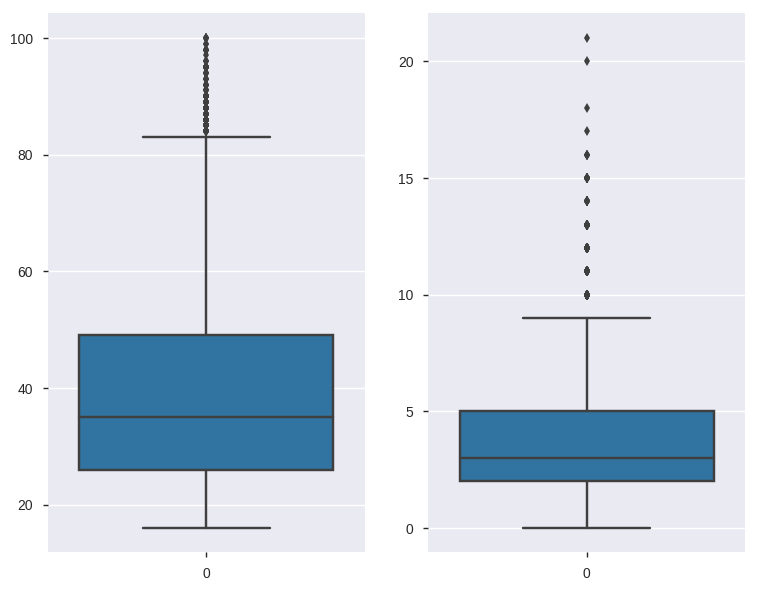

In [60]:
# boxplots
finfig, axx = plt.subplots(1,2, figsize=(9,7))
sns.boxplot(data=fin['respondent_age'], ax=axx[0])
sns.boxplot(data=fin['household_size'], ax=axx[1])


### Bivariate Analysis

In [61]:
# checking the descriptive statistics for the numerical variables

fin.describe()

,year,household_size,respondent_age
count,23313.000000,23313.000000,23313.000000
mean,2016.977952,3.688414,38.793549
std,0.849034,2.280842,16.510611
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [62]:
# checking for the correlation between the variables household size and respondent age using corr()
fin['household_size'].corr(fin['respondent_age'])

# the correlation between the two variables (respondent age & household size) is a negative weak correlation

-0.11918485538538873

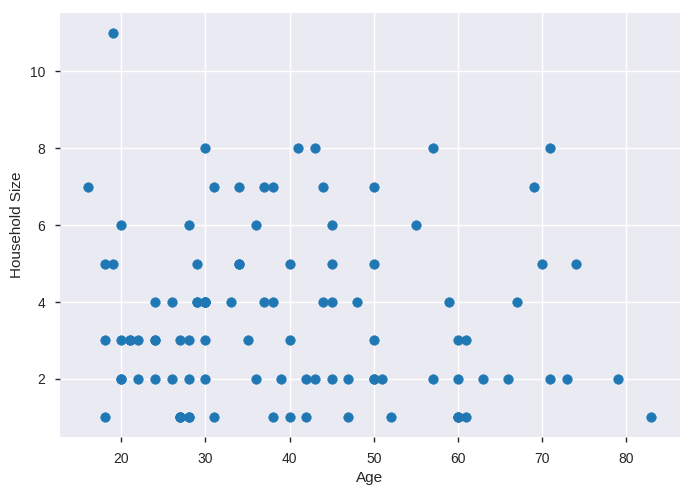

In [63]:
# using a scatter plot to check for correlation between household size and respondent age

fn = fin.sample(100)
plt.scatter(fn['respondent_age'], fn['household_size'])
#plt.plot(figsize=(4,2))
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()

# points are scattered all over, we can conclude that the two variables have no correlation

## Creating a model

In [64]:
fin.head()

,country,year,uniqueid,has_bank_account,location,cellphone_access,household_size,respondent_age,gender_of_respondent,rltshp_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [141]:
fin['uniqueid'].value_counts().sum()

23313

In [0]:
# creating the features and labels for the model

X = fin.drop(['uniqueid', 'year', 'has_bank_account'], 1)
y = fin['has_bank_account']

# has bank account column is selected as the target/label (i.e. y) for the model,
# it contains two unique values, 'yes' and 'no'
# the features for the model (i.e. X) are all the columns excluding of the uniqueid, has_bank_account, year, and country columns

In [66]:
X.head()


,country,location,cellphone_access,household_size,respondent_age,gender_of_respondent,rltshp_with_head,marital_status,education_level,job_type
0,Kenya,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [67]:
# converting the categorical columns in the features to numerical variables using get_dummies()

fin_ml = pd.get_dummies(X)
fin_ml.head()

,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,rltshp_with_head_Child,rltshp_with_head_Head of Household,rltshp_with_head_Other non-relatives,rltshp_with_head_Other relative,rltshp_with_head_Parent,rltshp_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [68]:
# checking the datatypes and number of variables 
fin_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 39 columns):
household_size                                     23313 non-null float64
respondent_age                                     23313 non-null float64
country_Kenya                                      23313 non-null uint8
country_Rwanda                                     23313 non-null uint8
country_Tanzania                                   23313 non-null uint8
country_Uganda                                     23313 non-null uint8
location_Rural                                     23313 non-null uint8
location_Urban                                     23313 non-null uint8
cellphone_access_No                                23313 non-null uint8
cellphone_access_Yes                               23313 non-null uint8
gender_of_respondent_Female                        23313 non-null uint8
gender_of_respondent_Male                          23313 non-null uint8
rltshp_with_head_Child 

In [0]:
# splitting dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fin_ml, y, test_size=0.2, random_state=0)

In [0]:
# applying normalization on the features using standard scaler normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# applying pca on the features

from sklearn.decomposition import PCA

pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [111]:
# checking the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.03634787e-01, 7.61081750e-02, 7.25683829e-02, 5.45075658e-02,
       5.27616028e-02, 4.59222088e-02, 4.19852007e-02, 3.72123914e-02,
       3.39169713e-02, 3.28416701e-02, 3.13133335e-02, 2.78664459e-02,
       2.76848218e-02, 2.64534755e-02, 2.60205157e-02, 2.57291787e-02,
       2.56439965e-02, 2.55109816e-02, 2.51555107e-02, 2.48946820e-02,
       2.42446269e-02, 2.30898005e-02, 2.15638615e-02, 2.06603331e-02,
       2.01599225e-02, 1.62262372e-02, 1.38044002e-02, 1.19997622e-02,
       1.14713838e-02, 9.79928282e-03, 9.24849138e-03, 3.95847226e-32,
       4.84678902e-33, 2.94363254e-33, 2.41107964e-33, 1.10347663e-33,
       9.04236780e-34, 6.85989890e-34, 8.58804031e-35])

In [0]:
# checking results with 31 principal components 
from sklearn.decomposition import PCA

pca = PCA(n_components=31)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [113]:
# training and making predictions using RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# predicting the label

pred_y = classifier.predict(X_test)
pred_y

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Performance Evaluation

In [114]:
# performance evaluation of model 
from sklearn.metrics import confusion_matrix, accuracy_score

cmatrix = confusion_matrix(y_test, pred_y)
print(cmatrix)
print('Accuracy is: {}' .format(accuracy_score(y_test, pred_y)))
print('\nPercentage Accuracy with PCA is: {}%' .format(accuracy_score(y_test, pred_y) * 100))

# the output indicates that with 31 principal components, 
# the randomforest classifier predicted persons likely to own a bank account with 86.489% accuracy while using pca for dimensionality reduction

[[4007    2]
 [ 628   26]]
Accuracy is: 0.8648938451640574

Percentage Accuracy with PCA is: 86.48938451640575%
